import neccessary librares

In [1]:
import pandas as pd
from openpyxl import Workbook
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
import os
import glob
import re
from PIL import Image
import imageio

get input from excel file named 'data.xlsx'
there are 2 row 'x' & 'y'

In [2]:
train = pd.read_excel('data.xlsx')
x = train['x']
x = np.array(x)
y = train['y']
y = np.array(y)
print('x:', x)
print('y:', y)

x: [ 1  2  3  4  5  6  7  8  9 10]
y: [ 2  4  6  8 10 12 14 16 18 20]


define loss function loss_function, J = (Yactual-Ypredicted)^2
where, Yactual is taken from the dataset(data.xlsx) & 
Ypredicted is predicted using w & b (Ypredicted = w * x + b)

In [3]:
def loss_function(w, b, x, y):
    return np.square(y - (w * x + b))

genereate djBydw, djBydb, loss for each data

In [4]:
def generateFun(w, b):
    djBydw = 0
    djBydb = 0
    loss = 0
    for xi, yi in zip(x, y):
        djdw = grad(loss_function, 0)
        djBydw += djdw(w, b, xi, yi)
        djdb = grad(loss_function, 1)
        djBydb += djdb(w, b, xi, yi)
        loss += loss_function(w, b, xi, yi)
        # print(djBydw)
        # print(djBydb)
        # print(loss)
    return djBydw, djBydb, loss

create 'output.xlsx' to store loss values for each iteration
create images folder to store the images created in each iteration

In [5]:
iteration = 1000
wb = Workbook()
wb.save("output.xlsx")
os.makedirs("images", exist_ok=True)

define GIF generating function from images

In [6]:
def generateGIF(folder):
    # Define the input and output file paths
    fp_in = f"{folder}\\*.png"
    fp_out = "output.gif"

    # Define a function for natural sorting
    natsort = lambda s: [int(t) if t.isdigit() else t.lower() for t in re.split('(\d+)', s)]

    # Get a list of image file paths sorted by their natural order
    img_files = sorted(glob.glob(fp_in), key=natsort)

    # Open the first image and extract the rest of the images
    img, *imgs = [Image.open(f) for f in img_files]

    # Save the images as a GIF
    img.save(fp=fp_out, format='GIF', append_images=imgs,
             save_all=True, duration=200, loop=0)

    print("GIF created successfully!")


set initial w & b,
set learning rate
iterate 1000 times & store the images of predicted line at 'images' directory

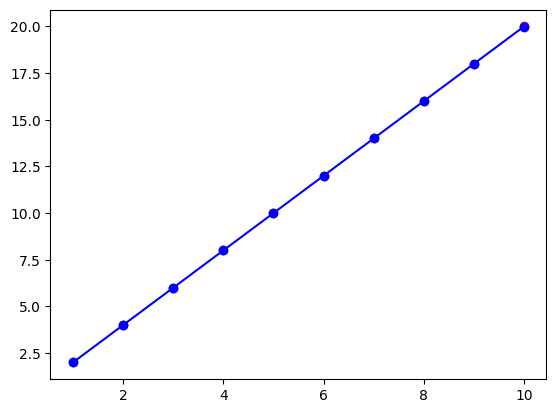

In [7]:
w = 0.05
b = 0.025
learning_rate = 0.001
output = pd.read_excel('output.xlsx')
loss_values = []
iteration_no = []

plt.scatter(x, y, color='r', label='Main Line')
aux_line, = plt.plot([], [], marker='o', linestyle='-', color='b', label='Line')
for i in range(iteration):
    djBydw ,djBydb, loss = generateFun(w,b)
    w = w - (learning_rate * djBydw)
    b = b - (learning_rate * djBydb)
    # print(w)
    # print(b)
    if (i%100 == 0):    # storing images after each 100 iteration as 1000 images is time consuming and the effects of change seems not clear
        Ypredicted = w * x + b
        aux_line.set_data(x, Ypredicted)
        plt.savefig(f'images/{i}.png',dpi=300)

    iteration_no.append(i)
    loss_values.append(loss)

output['iteration_no'] = iteration_no
output['loss_values'] = loss_values
output.to_excel('output.xlsx', index=False)

# Create a DataFrame with iteration numbers and loss values as separate columns
# data = {'iteration_no': iteration_no, 'loss_values': loss_values}
# output = pd.DataFrame(data)


In [8]:
generateGIF('images')

GIF created successfully!
